In [5]:
pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=a2a5e0a21756bcda3da170c92dc7ccdc61b38459b4708b281fc0c3932b16e6f4
  Stored in directory: /root/.cache/pip/wheels/ab/0f/23/3c010c3fd877b962146e7765f9e9b08026cac8b035094c5750
Successfully built autocorrect


In [36]:
pip install sklearn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=1d8099d407e203cf9d5ca5cc405339abf39c1d7ea99e9b079fe577d20a52bdb5
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 64.0 MB/s eta 0:00:00


In [7]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.3 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=4f79ad29e067ef372840f408c90e070ffad2cf1c4ec7a21b9c1d9e423c87a6cc
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [26]:
!pip install fastText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!git clone https://github.com/facebookresearch/fastText.git
!cd fastText
!pip install fastText
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
# model = fasttext.load_model('cc.en.300.bin')

In [73]:
from sklearn import metrics
import pandas as pd
import os
import nltk
from sklearn.model_selection import GridSearchCV
import numpy as np
from nltk.corpus import stopwords
from autocorrect import Speller
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from transformers import TFBertTokenizer
from tqdm import tqdm
import spacy
import re
from nltk.tokenize import word_tokenize
nlp = spacy.load('en_core_web_sm')
import torch
import torch.nn as nn
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import sentence_transformers
from sklearn.svm import SVC
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from tqdm import tqdm
import fastText as ft
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [61]:
#evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [10]:
final_cleaned_data.to_csv("final_cleaned_data.csv")

In [11]:
final_cleaned_data.dropna(inplace = True)
final_cleaned_data.reset_index(drop = True,inplace = True)
final_cleaned_data.drop("Unnamed: 0",axis = 1,inplace = True)

## NON-CONTEXTUALIZED EMBEDDINGS

In [12]:
final_cleaned_data

,text,target
0,real good moment miss much,0
1,reading manga,0
2,need send em accountant tomorrow oddly even re...,0
3,add myspace myspace com lookthunder,0
4,sleepy good time tonight though,0
...,...,...
17034,never trust anyone wife told love anymore attr...,1
17035,someone talk would nice feeling ending long ti...,1
17036,falling apart sucked lot lifetime year old som...,1
17037,anymore guess posting least someone world noti...,1


In [57]:
model = fasttext.load_model('cc.en.300.bin')

In [13]:
fastext_embeddings = []
for i in tqdm(range(0,len(final_cleaned_data))):
  fastext_embeddings.append(model.get_sentence_vector(final_cleaned_data.text[i]))

100%|██████████| 17039/17039 [00:04<00:00, 4134.98it/s]


In [58]:
Fasttext_embeddings_data = pd.DataFrame(columns = ['embeddings','target'])
Fasttext_embeddings_data['embeddings'] = fastext_embeddings
Fasttext_embeddings_data['target'] = final_cleaned_data['target']

In [59]:
train_X,test_X,train_Y,test_Y = train_test_split(Fasttext_embeddings_data['embeddings'],Fasttext_embeddings_data['target'],test_size=0.2, stratify = Fasttext_embeddings_data['target'])

In [81]:
model_svm = clf = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True)
model_svm.fit(list(train_X),list(train_Y))

SVC(C=1000000000.0, gamma=1e-07, probability=True)

In [38]:
model_svm.score(list(test_X),list(test_Y))

SVC()

In [64]:
predictions = model_svm.predict(list(test_X))

In [67]:
print("Accuracy Score for test_set :",accuracy_score(predictions,list(test_Y)))

Accuracy Score for test_set : 0.9683098591549296


In [72]:
cf = confusion_matrix(predictions,list(test_Y))

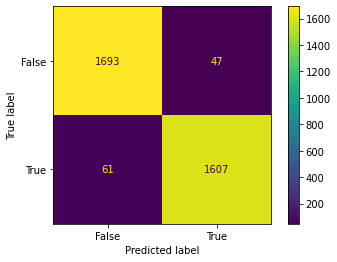

In [74]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

In [86]:
probs = model_svm.predict_proba(list(test_X))

In [88]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(list(test_Y), malignant_probs)
roc_auc = auc(fpr, tpr)

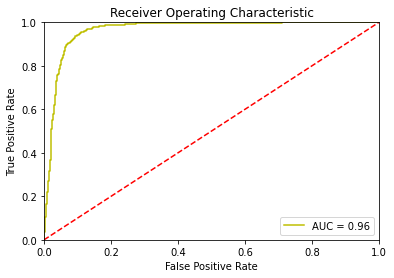

In [89]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
print("Precision Score for the data",precision_score(predictions,list(test_Y)))

Precision Score for the data 0.971584038694075


In [122]:
print("F1 Score for the data",f1_score(predictions,list(test_Y)))

F1 Score for the data 0.9590288315629741


## CONTEXTUALIZED EMBEDDINGS

In [91]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [92]:
sentence_embeddings = []
for i in tqdm(range(0,len(final_cleaned_data))):
  sentence_embeddings.append(sbert_model.encode(final_cleaned_data.text[i]))

100%|██████████| 17039/17039 [1:02:00<00:00,  4.58it/s]


In [107]:
sentence_embeddings_data = pd.DataFrame(columns = ['embeddings','target'])
sentence_embeddings_data['embeddings'] = sentence_embeddings
sentence_embeddings_data['target'] = final_cleaned_data['target']


In [108]:
sentence_embeddings_data

,embeddings,target
0,"[-0.4954882, -0.18892694, 1.7694762, 0.8761583...",0
1,"[-0.2776477, -0.5735779, 1.3699231, -0.0845790...",0
2,"[0.3805919, 0.26211494, 2.0566144, 0.32989317,...",0
3,"[0.0472359, 0.20624334, 1.0801419, -0.14343448...",0
4,"[0.004432879, -0.8218864, 2.1885984, 0.0841279...",0
...,...,...
17034,"[-0.15947072, 0.69955933, 1.4441274, 0.1500620...",1
17035,"[-0.6851524, 0.5329833, 0.56342185, 0.20912302...",1
17036,"[-0.40792546, 0.7359363, 0.59198934, 0.1832626...",1
17037,"[0.010810262, 0.8289846, 0.635607, 0.21855432,...",1


In [109]:
train_X,test_X,train_Y, test_Y = train_test_split(sentence_embeddings_data['embeddings'],sentence_embeddings_data['target'],test_size=0.2, stratify = sentence_embeddings_data['target'])

In [110]:
model_svm = clf = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True)
model_svm.fit(list(train_X),list(train_Y))

SVC(C=1000000000.0, gamma=1e-07, probability=True)

In [111]:
print(model_svm.score(list(test_X),list(test_Y)))

0.960387323943662


In [112]:
predictions = model_svm.predict(list(test_X))

In [113]:
print("Accuracy Score for test_set :",accuracy_score(predictions,list(test_Y)))

Accuracy Score for test_set : 0.960387323943662


In [114]:
cf = confusion_matrix(predictions,list(test_Y))

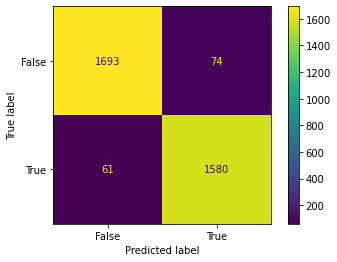

In [115]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

In [116]:
probs = model_svm.predict_proba(list(test_X))

In [117]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(list(test_Y), malignant_probs)
roc_auc = auc(fpr, tpr)

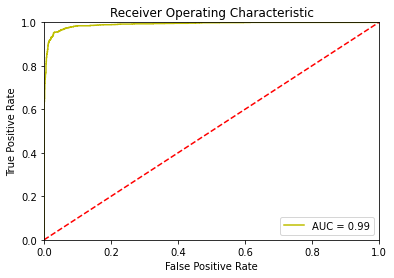

In [118]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
print("Precision Score for the data",precision_score(predictions,list(test_Y)))

Precision Score for the data 0.9552599758162031


In [120]:
print("Precision Score for the data",f1_score(predictions,list(test_Y)))

Precision Score for the data 0.9590288315629741


In [121]:
Fasttext_embeddings_data.to_csv('Fasttext_embeddings_data.csv')
sentence_embeddings_data.to_csv('sentence_transformer_embeddings.csv')